# Food Orders Analysis

This notebook provides an analysis of the food delivery data from New Delhi.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

## Load the Data

In [2]:
# Load the dataset
file_path = 'food_orders_new_delhi.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


## Data Cleaning

In [3]:
# Convert date columns to datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

# Check for missing values
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

## Exploratory Data Analysis (EDA)

In [4]:
# Summary statistics
data.describe()

,Order ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2024-01-20 11:03:07.648000,2024-01-20 12:16:42.148000256,1053.969000,28.620000,126.99000,29.832000,28.300000
min,1.000000,2024-01-01 02:12:47,2024-01-01 03:59:47,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,2024-01-11 18:45:27.249999872,2024-01-11 19:54:57.249999872,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,2024-01-20 11:38:43,2024-01-20 13:02:23,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,2024-01-30 03:47:34.249999872,2024-01-30 05:09:34.249999872,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,2024-02-07 23:56:12,2024-02-08 01:45:12,1995.000000,50.000000,200.00000,50.000000,150.000000
std,288.819436,NaN,NaN,530.975339,16.958278,43.06405,11.627165,49.614228


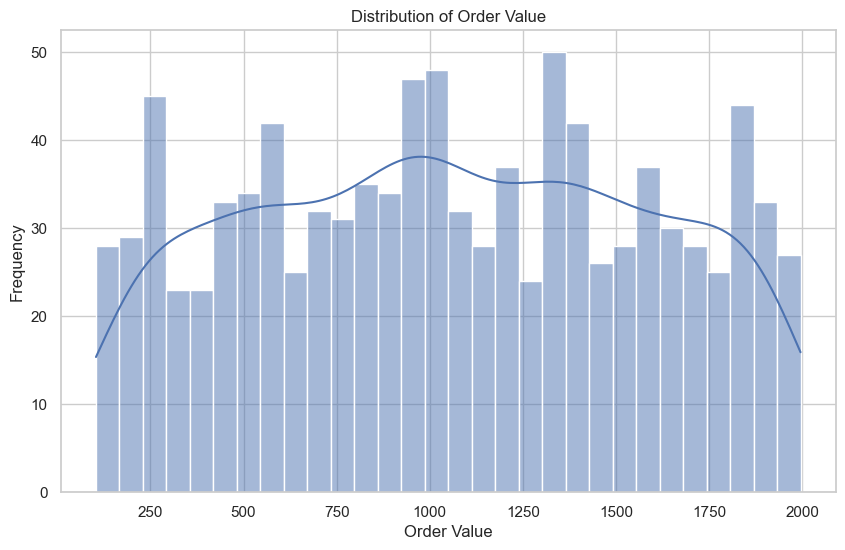

In [5]:
# Distribution of Order Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Order Value'], bins=30, kde=True)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [6]:
# Calculate delivery time in minutes
data['Delivery Time (minutes)'] = (data['Delivery Date and Time'] - data['Order Date and Time']).dt.total_seconds() / 60

# Display the first few rows to check the new feature
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time (minutes)
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0


## Analysis

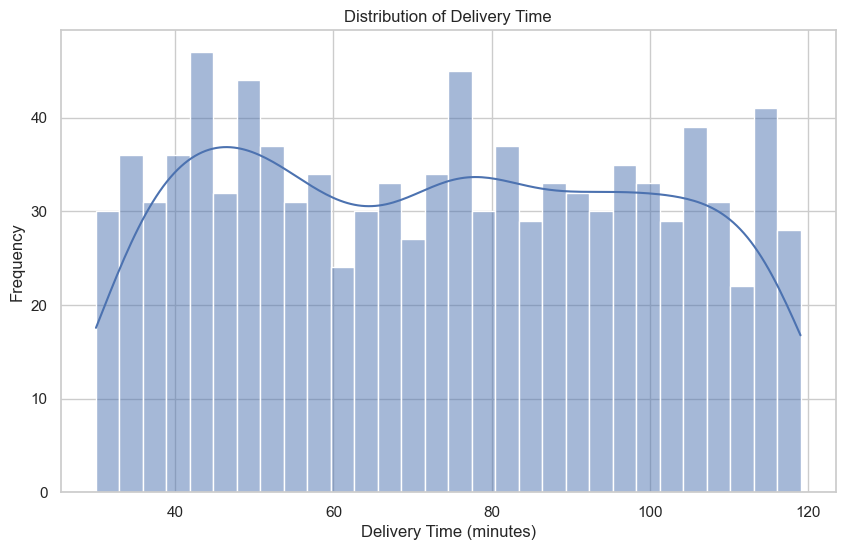

In [7]:
# Delivery Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery Time (minutes)'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

## Conclusion

Summarize the key findings from the analysis.